<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Fancy Indexing](02.07-Fancy-Indexing.ipynb) | [Contents](Index.ipynb) | [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) >

# 排序

# Sorting Arrays

到目前为止，我们主要讨论了 NumPy 中如何访问和修改数据。本节讨论 NumPy 中的排序算法。这些算法也是很多计算机科学入门课程中常见的主题：如果你修过相关课程，你可能已经对*插入排序*，*选择排序*，*归并排序*，*快速排序*，*冒泡排序*以及很多其他算法有些印象了（当然，可能是很不好的印象）。所有这些都是为了完成同一个任务：对列表或数组中的值进行排序。

Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more.
All are means of accomplishing a similar task: sorting the values in a list or array.

例如，简单的*选择排序*从列表中重复查找最小值，并进行交换直到列表排序完毕。我们可以用 Python 这么实现：

For example, a simple *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

任何一个计算机专业一年级的学生都会告诉你，选择排序实现起来非常简单，但是在处理大型数组时会非常缓慢。对于一个有 $N$ 个值得列表，它需要 $N$ 次循环，每次需要 $\sim N$ 次比较找到最小值并进行交换。“大 O 表示法”经常被用于定义算法的效率（见[大 O 表示法](#Aside:-Big-O-Notation)）而选择排序的平均计算复杂度为 $\mathcal{O}[N^2]$，即如果数组的长度翻倍其执行时间会时当前数组执行时间的四倍。

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.
For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.
In terms of the "big-O" notation often used to characterize these algorithms (see [Big-O Notation](#Aside:-Big-O-Notation)), selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

不过就算是选择排序也比我最喜欢的 *bogosort* 要快的多：

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the *bogosort*:

In [3]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [4]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

这个慢的要死的排序算法纯粹靠猜：它对数组进行多次随机排序，直到某一次排序恰好把结果按照从小到大的方式排列。其平均算法复杂度是 $\mathcal{O}[N \times N!]$，（就是 N * N），很显然这种低效的算法是永远不会用着任何真正的代码中。

This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted.
With an average scaling of $\mathcal{O}[N \times N!]$, (that's *N* times *N* factorial) this should–quite obviously–never be used for any real computation.

幸运的是，Python 中包含内置的排序算法比我们看到的简单算法效率要高得多。我们将首先看看 Python 的内置排序函数，然后再看看 NumPy 中包含的针对 NumPy 数组进行了优化的排序算法。

Fortunately, Python contains built-in sorting algorithms that are *much* more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

## 用 ``np.sort`` 和 ``np.argsort`` 在 NumPy 中进行排序

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

虽然 Python 内置 ``sort`` 和 ``sorted`` 函数，但是我们这里暂不讨论它。因为 NumPy 中的 ``np.sort`` 比它们要快的多。``np.sort`` 默认采用计算复杂度为 $\mathcal{O}[N\log N]$ 的*快速排序*算法，不过 ``np.sort`` 也支持*归并排序*和 *heap 排序*。大多是情况，默认的排序算法就已经够了。

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

如果要从原始数组返回一个排序后的数组，你可以使用 ``np.sort``：

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [6]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

如果你想对数组原地排序，可以使用 ``sort`` 方法：

If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

In [7]:
x.sort()
print(x)

[1 2 3 4 5]


另一个相关的排序算法是 ``argsort`` 它会返回排序后元素的*索引*：

A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [8]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


第一个值是最小的元素的索引，第二个值是第二小元素的索引，以此类推。这些索引可以用于构建排序后的结果（比如用 fancy indexing）：

The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [9]:
x[i]

array([1, 2, 3, 4, 5])

## 按照行或列进行排序

### Sorting along rows or columns

NumPy 的排序算法还可以按照行或者列进行排序：

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [10]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [11]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

注意这里会被行或者列按照一个独立的数组进行排序，行与列之间的关系都会丢失。

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## 局部排序：分割

## Partial Sorts: Partitioning

有时候我们不需要对整个数组进行排序而只是要找到 *k* 个最小的值。NumPy 提供 ``np.partition`` 函数，通过传递一个数组以及 *K* 值，其结果就是一个将 *K* 个最小值放在数组左侧的新数组：

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

新数组的前三个值就是整个数组中最小的三个值，剩下的值排在它们的右侧，而这两部分中的数据并没有被排序。和排序类似，我们可以对多维数组的任何一个维度进行 partition。

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [14]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

其结果中，每一行的前两个值是就是整行中最小的两个值。

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

除此之外，``np.argsort`` 返回排序后的索引，``np.argpartition`` 返回 partition 的索引。后面的章节会对其进行介绍。

Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.
We'll see this in action in the following section.

## 示例：K 近邻算法

## Example: k-Nearest Neighbors

这里我们看看如何用 ``argsort`` 函数获取每个点最近邻。首先创建一个包含 10 个点的而且数组，它是一个 $10\times 2$ 的数组：

Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

In [15]:
X = rand.rand(10, 2)

其散点图如下所示：

To get an idea of how these points look, let's quickly scatter plot them:

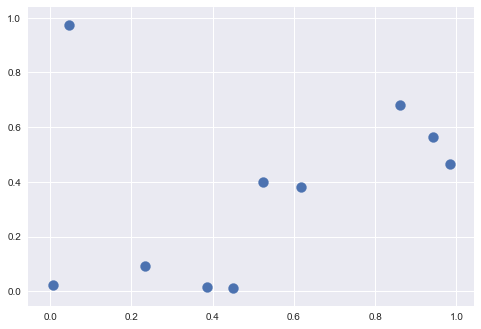

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

这里我们要计算每对点之间的距离。两点间平方距离为两个点每个维度差的平方之和，采用广播（[数组计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb)）和聚合（[聚合：最大值、最小值以及其他](02.04-Computation-on-arrays-aggregates.ipynb)）算法，我们可以用一行代码计算它们的平方距离：

Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting ([Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)) and aggregation ([Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb))  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [16]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

这个操作比较复杂，如果你不熟悉 NumPy 的广播规则可能会不太好理解。但你遇到这样的代码的时候，把它一步一步的拆分可能会更容易理解：

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [17]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [18]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [19]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

如果想要确认一下我们做对了，可以看看这个矩阵的对角线是不是都为 0（因为每个点和自己的距离为 0）：

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [20]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

没错！有了这个平方距离矩阵，我们就可以用 ``np.argsort`` 按行排序，每一行的最左侧就包含了每个点的最近邻：

It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [21]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


可以看到，第一列是 0 到 9：因为每个点的最近邻是它们自己。对数组进行排序实际上我们不仅仅得到了最近邻，如果我们仅仅想要获得 $k$ 个最近邻只需要获取 $k + 1$ 个最小平方距离，通过 ``np.argpartition`` 就可以做到：

Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

In [22]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

为了展示这个结果，我们把每个点与其最近的两个邻居连接起来：

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

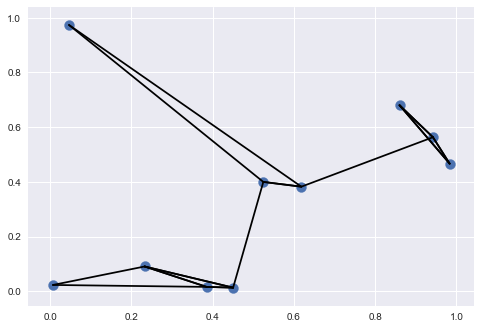

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

每个点都与其最近的两个邻居连接。图中有些点不仅仅连接了两条线，是因为如果 A 是 B 的最近邻之一，那么 B 也是 A 的最近邻。虽然采用广播和按行排序看起来可能不如循环来的自然，但是这么操作的效率是最高的。你可以遍历数组并为每一个点一次找到它们的最近邻，但是这样回避我们提供的向量化算法慢得多。并且这种向量化的方式可以忽略数组的长度：不论是计算 100 个点还是计算 1000000 个点，代码不会因此发生任何变化（因为效率最优，无需因规模扩大而修改算法）。

Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

当然如果是对超大规模数组进行最近邻算法，有基于树或者是近似算法可以达到 $\mathcal{O}[N\log N]$ 而不是 $\mathcal{O}[N^2]$ 的算法复杂度。其中一个算法就是 KD-Tree。[在 Scikit-Learn 中实现](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)。

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

## 附录：大 O 表示法

## Aside: Big-O Notation

大 O 表示法描述算法在不同规模的输入时的操作个数。想要正确的使用它需要了解一些计算机理论的知识，并了解它与 小 o 表示法、$\theta$ 表示法、$\Omega$ 表示法以及其他变体之间的区别。虽然这些区别更准确的表示了算法的复杂度，但是在计算科学理论考试和那些学术性博客的讨论之外，没人会对它们加以明确的区分。在数据科学世界中，更常见的是用大O标记：作为算法的复杂度的一般（如果不精确）描述。对于理论家和教授道歉，这是我们将在本书中使用的解释。

虽然这些区别增加了关于算法缩放，计算机科学理论考试和俚语博客评论者的评论的语句的精确性，你很少会在实践中看到这样的区别。在数据科学世界中更常见的是大O标记的不太严格的使用：作为算法的缩放的一般（如果不精确）描述。这就是我们将在本书中对其的使用方式。

Big-O notation is a means of describing how the number of operations required for an algorithm scales as the input grows in size.
To use it correctly is to dive deeply into the realm of computer science theory, and to carefully distinguish it from the related small-o notation, big-$\theta$ notation, big-$\Omega$ notation, and probably many mutant hybrids thereof.
While these distinctions add precision to statements about algorithmic scaling, outside computer science theory exams and the remarks of pedantic blog commenters, you'll rarely see such distinctions made in practice.
Far more common in the data science world is a less rigid use of big-O notation: as a general (if imprecise) description of the scaling of an algorithm.
With apologies to theorists and pedants, this is the interpretation we'll use throughout this book.

大 O 表示法，告诉你当数据量增加时，你的算法将花费多少时间。如果你有一个 $\mathcal{O}[N]$ 算法对长度 *N*=1,000 的列表进行操作耗时 1 秒钟，那么对于长度 *N*=5,000 的列表，大约需要5秒钟。如果你有一个 $\mathcal{O}[N^2]$ 的算法，*N*=1000 时需要1秒，那么 *N*=5000 时需要大约 25 秒。

Big-O notation, in this loose sense, tells you how much time your algorithm will take as you increase the amount of data.
If you have an $\mathcal{O}[N]$ (read "order $N$") algorithm that takes 1 second to operate on a list of length *N*=1,000, then you should expect it to take roughly 5 seconds for a list of length *N*=5,000.
If you have an $\mathcal{O}[N^2]$ (read "order *N* squared") algorithm that takes 1 second for *N*=1000, then you should expect it to take about 25 seconds for *N*=5000.

*N* 通常指示数据集的大小（点的数量，维度的数量等）。当试图分析数十亿或万亿的数据，$\mathcal{O}[N]$ 和 $\mathcal{O}[N^2]$ 之间可是天壤之别。注意，大O表示法不能告诉你一个计算的实际时间，只表述与 *N* 之间的关系。但是通常 $\mathcal{O}[N]$ 的算法比 $\mathcal{O}[N^2]$ 的算法要快。但是对于小数据集，更快的算法并不一定快。例如，$\mathcal{O}[N^2]$ 的算法可能需要 0.01 秒，而“更好”的 $\mathcal{O}[N]$ 的算法可能需要1秒。然而，将 *N* 扩大 1000 倍，$\mathcal{O}[N]$ 肯定会更快。

For our purposes, the *N* will usually indicate some aspect of the size of the dataset (the number of points, the number of dimensions, etc.). When trying to analyze billions or trillions of samples, the difference between $\mathcal{O}[N]$ and $\mathcal{O}[N^2]$ can be far from trivial!

Notice that the big-O notation by itself tells you nothing about the actual wall-clock time of a computation, but only about its scaling as you change *N*.
Generally, for example, an $\mathcal{O}[N]$ algorithm is considered to have better scaling than an $\mathcal{O}[N^2]$ algorithm, and for good reason. But for small datasets in particular, the algorithm with better scaling might not be faster.
For example, in a given problem an $\mathcal{O}[N^2]$ algorithm might take 0.01 seconds, while a "better" $\mathcal{O}[N]$ algorithm might take 1 second.
Scale up *N* by a factor of 1,000, though, and the $\mathcal{O}[N]$ algorithm will win out.

即使是这种简化版的大 O 表示法在比较算法的性能时也非常有用，本书中凡是讨论算法的地方我们都会用它来表示。

Even this loose version of Big-O notation can be very useful when comparing the performance of algorithms, and we'll use this notation throughout the book when talking about how algorithms scale.

<!--NAVIGATION-->
< [Fancy Indexing](02.07-Fancy-Indexing.ipynb) | [Contents](Index.ipynb) | [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) >